In [13]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error

In [2]:
!ls ../data/

sample_submission.csv			       test.csv
santander-customer-transaction-prediction.zip  train.csv


In [3]:
df = pd.read_csv("../data/train.csv")

In [4]:
for i,v in enumerate(df.columns):
    if df[v].dtype!=np.float64:
        print(i,v)

0 ID_code
1 target


In [5]:
print(df.shape)
df.head()

(200000, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
X= df.drop(["ID_code","target"],axis=1)
Y=df["target"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160000, 200)
(40000, 200)
(160000,)
(40000,)


In [8]:
# light gbm

In [85]:
params_naive={
    "learning_rate":0.1,    
    'max_bin':150,
    'num_leaves':32,
    "max_depth":11,
    "lambda_l1":0.1,
    "lambda_l2":0.2,
    "objective":"binary",    
    "early_stopping_rounds":10,
    "num_boost_round":300,
    "verbose_eval":10,
    "metric": "binary_logloss",
    "predict_leaf_index":True,
    "eval_metric":"binary_logloss"
}

In [86]:
dtrain = lgb.Dataset(x_train,label=y_train)
dtest = lgb.Dataset(x_test,label=y_test)
evals_result={}
gbm = lgb.train(params=params_naive,train_set=dtrain,valid_sets=[dtrain,dtest],evals_result=evals_result)

/home/timruning/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/timruning/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.320437	valid_1's binary_logloss: 0.326124
Training until validation scores don't improve for 10 rounds.
[2]	training's binary_logloss: 0.316636	valid_1's binary_logloss: 0.322692
[3]	training's binary_logloss: 0.313336	valid_1's binary_logloss: 0.31984
[4]	training's binary_logloss: 0.310177	valid_1's binary_logloss: 0.317241
[5]	training's binary_logloss: 0.307398	valid_1's binary_logloss: 0.3149
[6]	training's binary_logloss: 0.304841	valid_1's binary_logloss: 0.313012
[7]	training's binary_logloss: 0.302181	valid_1's binary_logloss: 0.310678
[8]	training's binary_logloss: 0.299717	valid_1's binary_logloss: 0.308729
[9]	training's binary_logloss: 0.297231	valid_1's binary_logloss: 0.306688
[10]	training's binary_logloss: 0.294979	valid_1's binary_logloss: 0.304745
[11]	training's binary_logloss: 0.292853	valid_1's binary_logloss: 0.302847
[12]	training's binary_logloss: 0.290931	valid_1's binary_logloss: 0.301308
[13]	training's binary_logloss: 0.2889

[111]	training's binary_logloss: 0.20177	valid_1's binary_logloss: 0.24044
[112]	training's binary_logloss: 0.201268	valid_1's binary_logloss: 0.240168
[113]	training's binary_logloss: 0.200784	valid_1's binary_logloss: 0.239886
[114]	training's binary_logloss: 0.200317	valid_1's binary_logloss: 0.23966
[115]	training's binary_logloss: 0.199836	valid_1's binary_logloss: 0.239332
[116]	training's binary_logloss: 0.199335	valid_1's binary_logloss: 0.239075
[117]	training's binary_logloss: 0.198856	valid_1's binary_logloss: 0.23883
[118]	training's binary_logloss: 0.198386	valid_1's binary_logloss: 0.238561
[119]	training's binary_logloss: 0.197943	valid_1's binary_logloss: 0.238321
[120]	training's binary_logloss: 0.197472	valid_1's binary_logloss: 0.23796
[121]	training's binary_logloss: 0.197042	valid_1's binary_logloss: 0.237722
[122]	training's binary_logloss: 0.196574	valid_1's binary_logloss: 0.237467
[123]	training's binary_logloss: 0.196138	valid_1's binary_logloss: 0.237245
[124

[218]	training's binary_logloss: 0.163159	valid_1's binary_logloss: 0.2228
[219]	training's binary_logloss: 0.16288	valid_1's binary_logloss: 0.222685
[220]	training's binary_logloss: 0.16259	valid_1's binary_logloss: 0.22256
[221]	training's binary_logloss: 0.162309	valid_1's binary_logloss: 0.222431
[222]	training's binary_logloss: 0.162047	valid_1's binary_logloss: 0.222378
[223]	training's binary_logloss: 0.161765	valid_1's binary_logloss: 0.22231
[224]	training's binary_logloss: 0.16149	valid_1's binary_logloss: 0.222225
[225]	training's binary_logloss: 0.161223	valid_1's binary_logloss: 0.222138
[226]	training's binary_logloss: 0.160947	valid_1's binary_logloss: 0.222007
[227]	training's binary_logloss: 0.160685	valid_1's binary_logloss: 0.2219
[228]	training's binary_logloss: 0.160421	valid_1's binary_logloss: 0.221846
[229]	training's binary_logloss: 0.160169	valid_1's binary_logloss: 0.221775
[230]	training's binary_logloss: 0.159905	valid_1's binary_logloss: 0.221691
[231]	tr

In [22]:
y_pred = gbm.predict(x_test)
print("auc={} , mse={}".format(roc_auc_score(y_test,y_pred),mean_squared_error(y_pred,y_test)))

auc=0.8863863185832579 , mse=0.06253935322844037


In [23]:
params_sklearn={
    "learning_rate":0.1,    
    'max_bin':150,
    'num_leaves':32,
    "max_depth":11,
    "reg_alpha":0.1,
    "reg_lambda":0.2,
    "objective":"binary",    
    "early_stopping_rounds":10,
    "num_boost_round":300,
    "verbose_eval":10,
    "metric": "binary_logloss",
    "eval_metric":"binary_logloss"
}

In [25]:
watchlist = [(x_train,y_train),(x_test,y_test)]
gbm2 = lgb.LGBMClassifier(**params_sklearn)

In [26]:
gbm2.fit(x_train,y_train,eval_set=watchlist)

/home/timruning/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/timruning/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.320437	valid_1's binary_logloss: 0.326124
Training until validation scores don't improve for 10 rounds.
[2]	training's binary_logloss: 0.316636	valid_1's binary_logloss: 0.322692
[3]	training's binary_logloss: 0.313336	valid_1's binary_logloss: 0.31984
[4]	training's binary_logloss: 0.310177	valid_1's binary_logloss: 0.317241
[5]	training's binary_logloss: 0.307398	valid_1's binary_logloss: 0.3149
[6]	training's binary_logloss: 0.304841	valid_1's binary_logloss: 0.313012
[7]	training's binary_logloss: 0.302181	valid_1's binary_logloss: 0.310678
[8]	training's binary_logloss: 0.299717	valid_1's binary_logloss: 0.308729
[9]	training's binary_logloss: 0.297231	valid_1's binary_logloss: 0.306688
[10]	training's binary_logloss: 0.294979	valid_1's binary_logloss: 0.304745
[11]	training's binary_logloss: 0.292853	valid_1's binary_logloss: 0.302847
[12]	training's binary_logloss: 0.290931	valid_1's binary_logloss: 0.301308
[13]	training's binary_logloss: 0.2889

[109]	training's binary_logloss: 0.202756	valid_1's binary_logloss: 0.241035
[110]	training's binary_logloss: 0.202241	valid_1's binary_logloss: 0.240708
[111]	training's binary_logloss: 0.20177	valid_1's binary_logloss: 0.24044
[112]	training's binary_logloss: 0.201268	valid_1's binary_logloss: 0.240168
[113]	training's binary_logloss: 0.200784	valid_1's binary_logloss: 0.239886
[114]	training's binary_logloss: 0.200317	valid_1's binary_logloss: 0.23966
[115]	training's binary_logloss: 0.199836	valid_1's binary_logloss: 0.239332
[116]	training's binary_logloss: 0.199335	valid_1's binary_logloss: 0.239075
[117]	training's binary_logloss: 0.198856	valid_1's binary_logloss: 0.23883
[118]	training's binary_logloss: 0.198386	valid_1's binary_logloss: 0.238561
[119]	training's binary_logloss: 0.197943	valid_1's binary_logloss: 0.238321
[120]	training's binary_logloss: 0.197472	valid_1's binary_logloss: 0.23796
[121]	training's binary_logloss: 0.197042	valid_1's binary_logloss: 0.237722
[122

[216]	training's binary_logloss: 0.163712	valid_1's binary_logloss: 0.222981
[217]	training's binary_logloss: 0.163439	valid_1's binary_logloss: 0.222879
[218]	training's binary_logloss: 0.163159	valid_1's binary_logloss: 0.2228
[219]	training's binary_logloss: 0.16288	valid_1's binary_logloss: 0.222685
[220]	training's binary_logloss: 0.16259	valid_1's binary_logloss: 0.22256
[221]	training's binary_logloss: 0.162309	valid_1's binary_logloss: 0.222431
[222]	training's binary_logloss: 0.162047	valid_1's binary_logloss: 0.222378
[223]	training's binary_logloss: 0.161765	valid_1's binary_logloss: 0.22231
[224]	training's binary_logloss: 0.16149	valid_1's binary_logloss: 0.222225
[225]	training's binary_logloss: 0.161223	valid_1's binary_logloss: 0.222138
[226]	training's binary_logloss: 0.160947	valid_1's binary_logloss: 0.222007
[227]	training's binary_logloss: 0.160685	valid_1's binary_logloss: 0.2219
[228]	training's binary_logloss: 0.160421	valid_1's binary_logloss: 0.221846
[229]	tr

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        early_stopping_rounds=10, eval_metric='binary_logloss',
        importance_type='split', learning_rate=0.1, max_bin=150,
        max_depth=11, metric='binary_logloss', min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_boost_round=300, num_leaves=32, objective='binary',
        random_state=None, reg_alpha=0.1, reg_lambda=0.2, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
        verbose_eval=10)

In [40]:
y_pred2 = gbm2.predict_proba(x_test)[:,1]
print("auc={} , mse={}".format(roc_auc_score(y_test,y_pred2),mean_squared_error(y_pred２,y_test)))

auc=0.8863863185832579 , mse=0.06253935322844037


In [51]:
gbm2.feature_importances_

array([ 74,  77,  72,  22,  25,  59, 103,   5,  30,  67,   3,  38,  80,
        78,   3,  37,  16,   0,  84,  17,  37,  84,  83,  49,  64,  17,
        85,  12,  37,  11,   5,  41,  65,  92,  83,  59,  65,  10,   9,
         4,  84,   6,  11,  45,  66,  39,  11,   5,  64,  68,  23,  44,
        50,  95,  30,  38,  70,  27,  37,  18,  20,  15,  23,  33,  16,
        12,  34,  71,  24,  20,  51,  70,  20,   5,  27,  71,  82,  35,
        82,   7,  81,  79,  49,  38,  19,  55,  54,  65,  38,  59,  52,
        77,  74,  64,  68,  64,   6,  35,   3,  84,   7,  18,  34,   2,
        49,  44,  59,  62,  80,  80,  84,  53,  42,  26,  50,  66,  44,
         8,  76,  63,  17,  75,  78,  74,   6,  51,   7,  71,  55,  11,
        53,  65,  45,  84,  32,  53,   9,  58,  31,  79,  33,  59,  33,
        22,  37,  60,  81,  72,  63,  62,  53,  46,  24,  13,  74,  65,
        33,  62,   4,  26,  10,   6,  64,  64,  74,  85,  92,  49,  33,
        82,  95,  34,  73,  62,  98,  45,  16,  73,  30,  72,  5

In [33]:
y_pred

array([0.00125243, 0.1077694 , 0.01536505, ..., 0.13035097, 0.29167889,
       0.02885061])

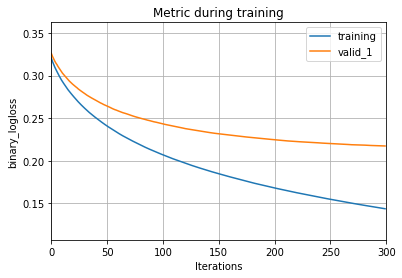

In [84]:
lgb.plot_metric(gbm2.evals_result_)

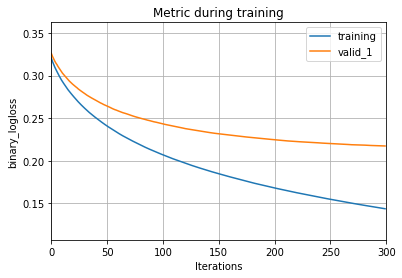

In [83]:
lgb.plot_metric(evals_result)

In [92]:
x_pred1 = gbm.predict(x_test,pred_leaf=True)

In [94]:
x_pred1.shape

(40000, 300)